In [1]:
# 知乎用户数据
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
import math
from locale import *
setlocale(LC_NUMERIC, 'English_US')
#atoi(data2['评论者回答数'][4]) 将千位分隔符数转化为整数

'English_United States.1252'

In [2]:
'''
pd.read_excel(io, sheet_name=0, header=0, names=None, index_col=None, 
              usecols=None, squeeze=False,dtype=None, engine=None, 
              converters=None, true_values=None, false_values=None, 
              skiprows=None, nrows=None, na_values=None, parse_dates=False, 
              date_parser=None, thousands=None, comment=None, skipfooter=0, 
              convert_float=True, **kwds)
1、io，Excel的存储路径

2、sheet_name，要读取的工作表名称

3、header， 用哪一行作列名

4、names， 自定义最终的列名

5、index_col， 用作索引的列

6、usecols，需要读取哪些列

7、squeeze，当数据仅包含一列

8、converters ，强制规定列数据类型

9、skiprows，跳过特定行

10、nrows ，需要读取的行数

11、skipfooter ， 跳过末尾n行
'''

'\npd.read_excel(io, sheet_name=0, header=0, names=None, index_col=None, \n              usecols=None, squeeze=False,dtype=None, engine=None, \n              converters=None, true_values=None, false_values=None, \n              skiprows=None, nrows=None, na_values=None, parse_dates=False, \n              date_parser=None, thousands=None, comment=None, skipfooter=0, \n              convert_float=True, **kwds)\n1、io，Excel的存储路径\n\n2、sheet_name，要读取的工作表名称\n\n3、header， 用哪一行作列名\n\n4、names， 自定义最终的列名\n\n5、index_col， 用作索引的列\n\n6、usecols，需要读取哪些列\n\n7、squeeze，当数据仅包含一列\n\n8、converters ，强制规定列数据类型\n\n9、skiprows，跳过特定行\n\n10、nrows ，需要读取的行数\n\n11、skipfooter ， 跳过末尾n行\n'

In [3]:
data1 = pd.read_excel('E:\python\data\数据挖掘\实验一\知乎用户.xlsx',sheet_name='知乎1',index_col="Id")
data2 = pd.read_excel('E:\python\data\数据挖掘\实验一\知乎用户.xlsx',sheet_name='知乎2',index_col="Id")

In [4]:
data1.head()

标题 评论者回答数  评论者提问  关注了       关注者
Id                                                                     
1   如何看待 2017 年 5 月 12 日爆发在各高校的电脑勒索比特币的病毒？    821    7.0  279   66127.0
2   如何看待 2017 年 5 月 12 日爆发在各高校的电脑勒索比特币的病毒？      2    0.0   27     553.0
3   如何看待 2017 年 5 月 12 日爆发在各高校的电脑勒索比特币的病毒？    492   62.0   91  180976.0
4   如何看待 2017 年 5 月 12 日爆发在各高校的电脑勒索比特币的病毒？     18    0.0   98     280.0
5   如何看待 2017 年 5 月 12 日爆发在各高校的电脑勒索比特币的病毒？    143    4.0  143     461.0

In [5]:
data2.head()

标题 评论者回答数 评论者提问  关注了    关注者
Id                                                   
1   为什么有相当一部分人都不愿意打开微软的自动更新？     16     0   47     32
2   为什么有相当一部分人都不愿意打开微软的自动更新？    105     1   13      7
3   为什么有相当一部分人都不愿意打开微软的自动更新？    490     3   40  62857
4   为什么有相当一部分人都不愿意打开微软的自动更新？  5,608   531  502  48916
5   为什么有相当一部分人都不愿意打开微软的自动更新？      7     0   70      3

In [6]:
def num(x):
    try:
        if((type(x)==str and x.trim()=='') or x==None  ):
            return 0
        else:
            return int(''.join(x.split(',')))
    except:
        return x

data1['评论者回答数'] = data1['评论者回答数'].fillna(0).apply(lambda x: num(x))
data1['评论者提问'] = data1['评论者提问'].fillna(0).apply(lambda x: num(x))
data1['关注了'] = data1['关注了'].fillna(0).apply(lambda x: num(x))
data1['关注者'] = data1['关注者'].fillna(0).apply(lambda x: num(x))
data2['评论者回答数'] = data2['评论者回答数'].fillna(0).apply(lambda x: num(x))
data2['评论者提问'] = data2['评论者提问'].fillna(0).apply(lambda x: num(x))
data2['关注了'] = data2['关注了'].fillna(0).apply(lambda x: num(x))
data2['关注者'] = data2['关注者'].fillna(0).apply(lambda x: num(x))

In [7]:
# plt.subplot(441)
# plt.scatter(data1['评论者回答数'],data1['评论者回答数'])
# plt.subplot(442)
# plt.scatter(data1['评论者回答数'],data1['评论者提问'])
# plt.subplot(4,4,16)
# plt.scatter(data1['评论者回答数'],data1['评论者提问'])
#plt.scatter(x, y, s=area, c=colors, alpha=0.5, marker=(9, 3, 30))
'''
c，s，alpha和marker，c就是为点指定的颜色数组，s是点的面积大小，alpha是点的颜色的透明度，
marker是指定点标记的形状。在例子里指定透明度为0.5，c和s是随机生成的，我们要改变的是marker的值
'''
from pylab import mpl
#plt.rcParams['figure.dpi'] = 80 
#mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']    # 指定默认字体：解决plot不能显示中文问题
mpl.rcParams['axes.unicode_minus'] = False           # 解决保存图像是负号'-'显示为方块的问题
def plot_all(data):
    font1 = {'family' : 'Microsoft YaHei',
            'weight' : 'normal',
            'size'   : 6,
            }
    count=1
    plt.rcParams['figure.dpi'] = 120
    plt.subplots_adjust(wspace=1 ,hspace=1)
    for i in data.columns:
        for j in data.columns:
            plt.subplot(data.shape[1],data.shape[1],count)
            plt.xlabel(i,font1)
            plt.ylabel(j,font1)
            plt.scatter(data1[i],data1[j],s=0.5,marker='1')
            count+=1
           

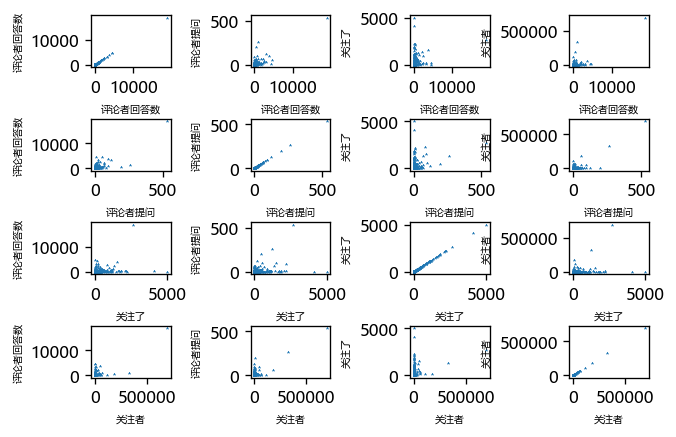

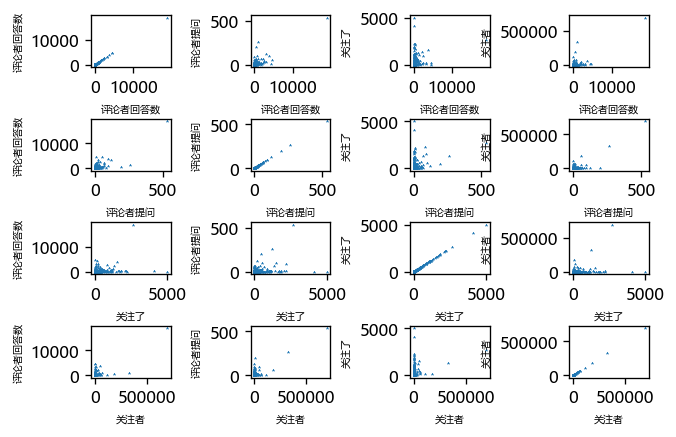

In [8]:
plot_all(data1.iloc[:,1:])
plt.show()
plot_all(data2.iloc[:,1:])
plt.show()

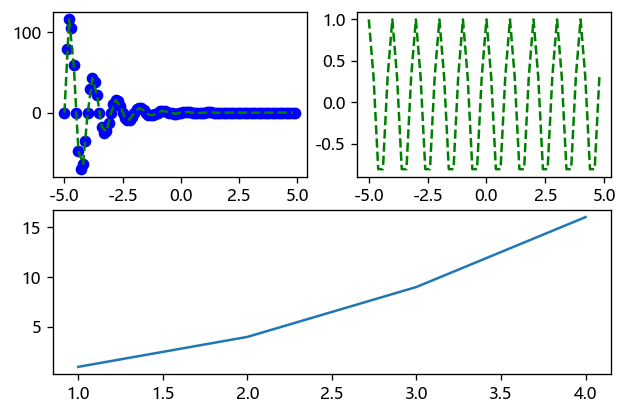

In [9]:
import matplotlib.pyplot as plt
import numpy as np

def f(t):
    return np.exp(-t) * np.sin(2 * np.pi * t)


if __name__ == '__main__':
    t1 = np.arange(-5, 5, 0.1)
    t2 = np.arange(-5, 5, 0.2)
    plt.figure()
    plt.subplot(221)
    plt.plot(t1, f(t1), 'bo', t2, f(t2), 'g--')
    plt.subplot(222)
    plt.plot(t2, np.cos(2 * np.pi * t2), 'g--')
    plt.subplot(212)
    plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
    plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


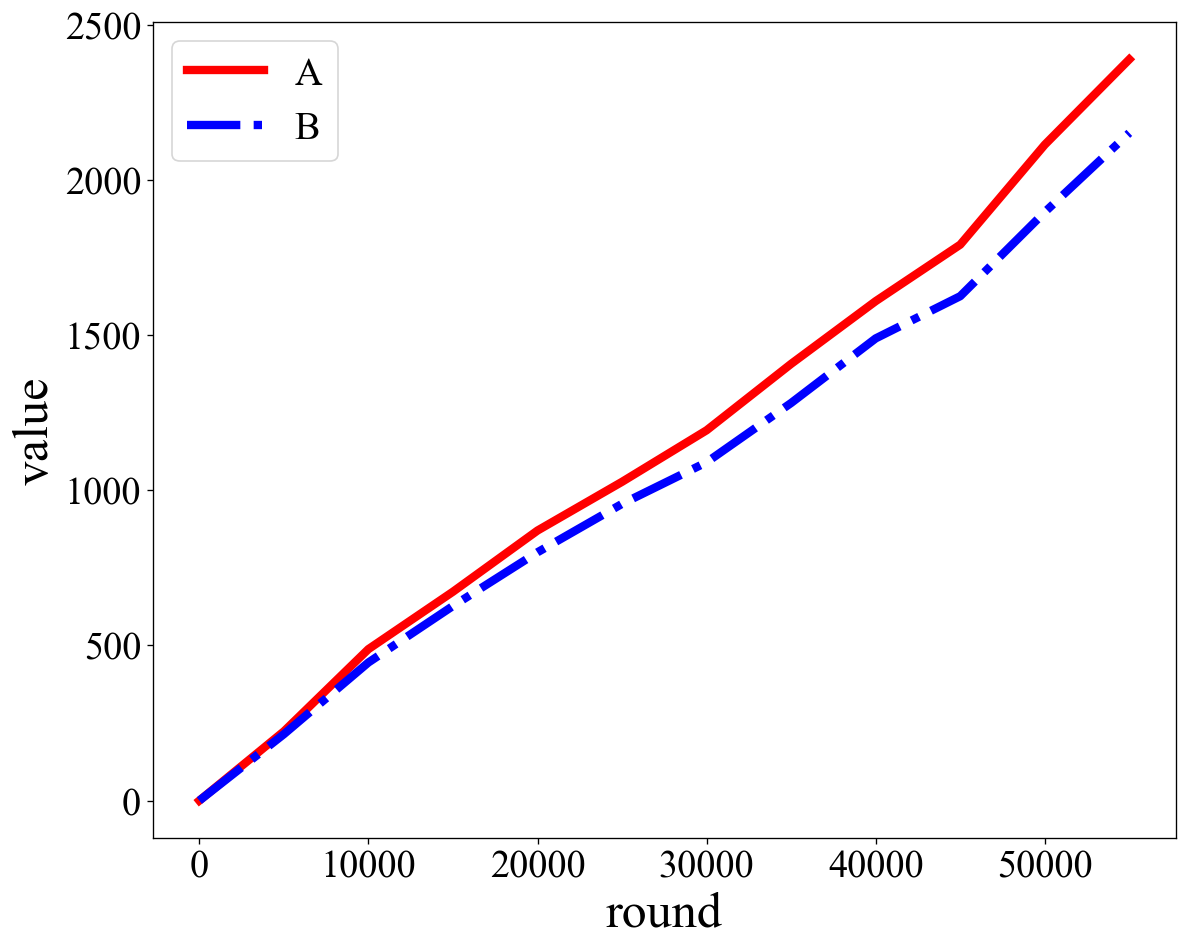

In [10]:
#--coding:utf-8--
import  matplotlib.pyplot as plt
 
#数据设置
x1 =[0,5000,10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 55000];
y1=[0, 223, 488, 673, 870, 1027, 1193, 1407, 1609, 1791, 2113, 2388];
 
x2 =[0,5000,10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 55000];
y2=[0, 214, 445, 627, 800, 956, 1090, 1281, 1489, 1625, 1896, 2151];
 
#设置输出的图片大小
figsize = 11,9
figure, ax = plt.subplots(figsize=figsize)
 
#在同一幅图片上画两条折线
A,=plt.plot(x1,y1,'-r',label='A',linewidth=5.0)
B,=plt.plot(x2,y2,'b-.',label='B',linewidth=5.0)
 
#设置图例并且设置图例的字体及大小
font1 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 23,
}
legend = plt.legend(handles=[A,B],prop=font1)
 
#设置坐标刻度值的大小以及刻度值的字体
plt.tick_params(labelsize=23)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Times New Roman') for label in labels]
 
#设置横纵坐标的名称以及对应字体格式
font2 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 30,
}
plt.xlabel('round',font2)
plt.ylabel('value',font2)
 
#将文件保存至文件中并且画出图
plt.savefig('figure.eps')
plt.show()

In [23]:
c = data1.iloc[:,1:].corr()
c2=data2.iloc[:,1:].corr()
print(c)

          评论者回答数     评论者提问       关注了       关注者
评论者回答数  1.000000  0.805686  0.300095  0.781666
评论者提问   0.805686  1.000000  0.322866  0.842589
关注了     0.300095  0.322866  1.000000  0.280169
关注者     0.781666  0.842589  0.280169  1.000000


Text(0.5, 1.0, '二维数组热力图')

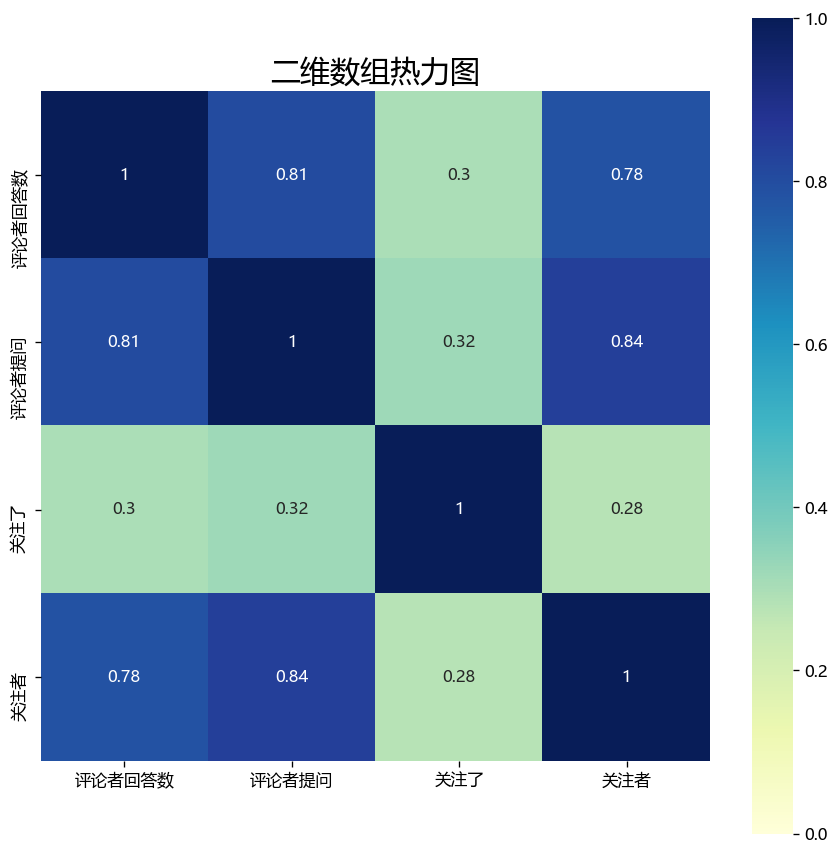

In [20]:
#seaborn.heatmap(data, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)¶

import seaborn as sns
fig, ax = plt.subplots(figsize = (9,9))
#二维的数组的热力图，横轴和数轴的ticklabels要加上去的话，既可以通过将array转换成有column
#和index的DataFrame直接绘图生成，也可以后续再加上去。后面加上去的话，更灵活，包括可设置labels大小方向等。
sns.heatmap(c, annot=True, vmax=1,vmin = 0, xticklabels= True, yticklabels= True, square=True, cmap="YlGnBu")

ax.set_title('二维数组热力图', fontsize = 18)
#ax.set_ylabel('数字', fontsize = 18)
#ax.set_xlabel('字母', fontsize = 18) #横变成y轴，跟矩阵原始的布局情况是一样的

Text(0.5, 1.0, '二维数组热力图')

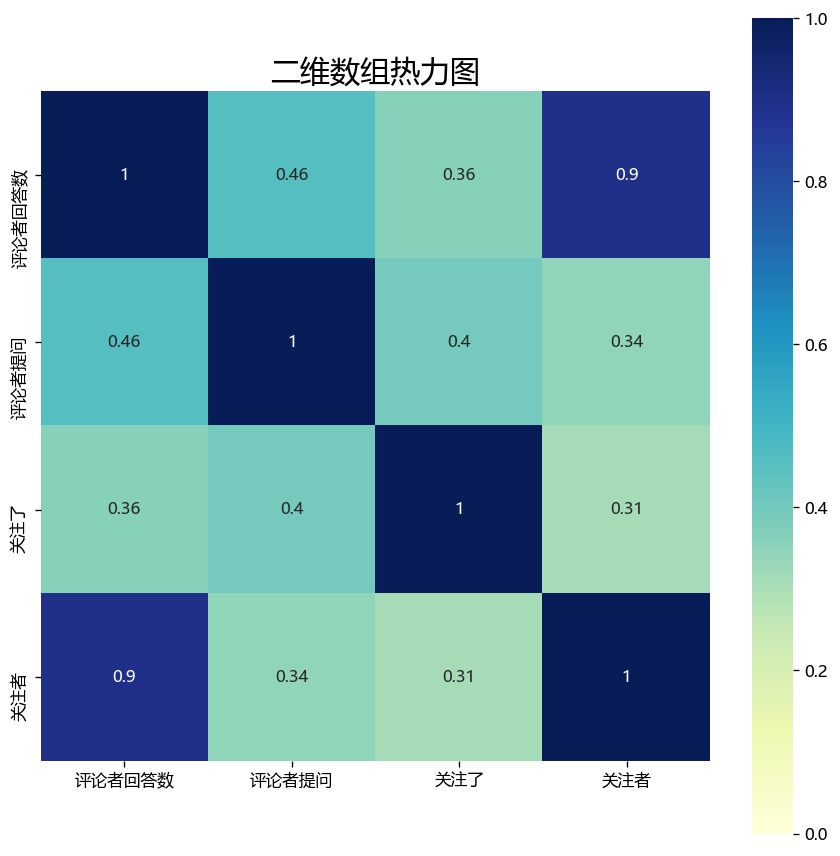

In [24]:
fig, ax = plt.subplots(figsize = (9,9))
sns.heatmap(c2, annot=True, vmax=1,vmin = 0, xticklabels= True, yticklabels= True, square=True, cmap="YlGnBu")
ax.set_title('二维数组热力图', fontsize = 18)

In [27]:
print(data1.describe())
print(data2.describe())

             评论者回答数       评论者提问          关注了            关注者
count    707.000000  707.000000   707.000000     707.000000
mean     178.213579    6.537482   153.910891    3144.844413
std      819.337171   25.898411   381.482302   30550.818487
min        0.000000    0.000000     0.000000       0.000000
25%        8.000000    0.000000    10.000000       2.000000
50%       31.000000    2.000000    43.000000      17.000000
75%      113.000000    5.000000   132.000000     124.500000
max    18764.000000  534.000000  5000.000000  694904.000000
             评论者回答数        评论者提问          关注了            关注者
count    646.000000   646.000000   646.000000     646.000000
mean     196.281734    10.608359   104.170279    2528.948916
std      837.979255    69.608606   347.582779   30076.024162
min        1.000000     0.000000     0.000000       0.000000
25%       12.000000     0.000000     5.000000       2.000000
50%       40.000000     1.000000    20.000000       9.000000
75%      143.750000     4.000000 

In [31]:
print(data1.iloc[:,1:].sum())
print(data2.iloc[:,1:].sum())

评论者回答数     125997.0
评论者提问        4622.0
关注了        108815.0
关注者       2223405.0
dtype: float64
评论者回答数     126798
评论者提问        6853
关注了         67294
关注者       1633701
dtype: int64


In [32]:
data1.iloc[:,1:].var()

评论者回答数    6.713134e+05
评论者提问     6.707277e+02
关注了       1.455287e+05
关注者       9.333525e+08
dtype: float64

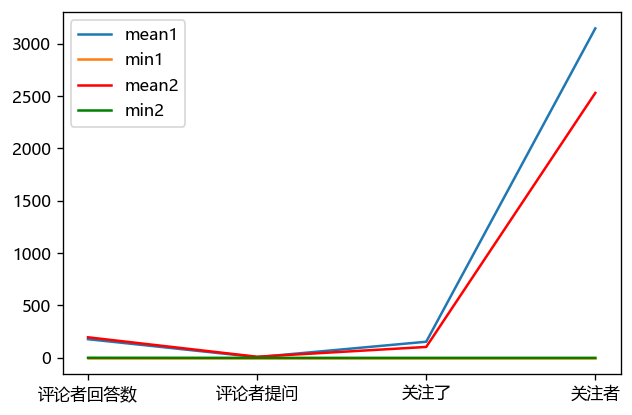

In [54]:
plt.plot(data1.describe().columns,data1.describe().iloc[1,:],label="mean1")
#plt.plot(data1.describe().columns,data1.describe().iloc[7,:],label="max1")
plt.plot(data1.describe().columns,data1.describe().iloc[3,:],label="min1")
plt.plot(data2.describe().columns,data2.describe().iloc[1,:],'r-',label="mean2")
#plt.plot(data2.describe().columns,data2.describe().iloc[7,:],'b-',label="max2")
plt.plot(data2.describe().columns,data2.describe().iloc[3,:],'g-',label="min2")
plt.legend()
plt.show()

In [1]:
import requests
import json
import re
import pandas as pd
FLAG = 1
count = 4676
dataset = []

while FLAG:
    url=r'https://www.zhihu.com/api/v4/questions/423833712/answers'
    headers={'User-Agent':'Mozilla/5.0 (Windows NT 10.0; WOW64; rv:57.0) Gecko/20100101 Firefox/57.0'}
    params={
        'include': 'data[*].is_normal,admin_closed_comment,reward_info,is_collapsed,annotation_action,annotation_detail,collapse_reason,is_sticky,collapsed_by,suggest_edit,comment_count,can_comment,content,editable_content,voteup_count,reshipment_settings,comment_permission,created_time,updated_time,review_info,relevant_info,question,excerpt,relationship.is_authorized,is_author,voting,is_thanked,is_nothelp,is_labeled,is_recognized,paid_info,paid_info_content;data[*].mark_infos[*].url;data[*].author.follower_count,badge[*].topics',
        'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36 QIHU 360SE',
        'limit': '20',
        'offset': str(count),
        'platform': 'desktop',
        'sort_by': 'default'
    }
    count = count+20
    print(count)
    res = requests.get(url,params=params,headers=headers)
    res.encoding='utf-8'
    #print(res.text)
    json_data = json.loads(res.text)
    paging = json_data['paging']['is_end']
    FLAG = (paging==0)
    for answer in json_data['data']:
        user_data = []
        u_id = (answer['id'])
        q_id = (answer['question']['id'])
        title = (answer['question']['title'])  
        name = (answer['author']['name'])   
        url_token = answer['author']['url_token']
        headline = (answer['author']['headline']) 
        gender = (answer['author']['gender'])                
        follower_count = (answer['author']['follower_count'])
        voteup_count = (answer['voteup_count'])
        comment_count = (answer['comment_count'])
        comment_permission = (answer['comment_permission'])
        content = (answer['content'])
        pre = re.compile('>(.*?)<')
        content = ''.join(pre.findall(content))
        user_data.append(u_id)
        user_data.append(q_id)
        user_data.append(title)
        user_data.append(name)
        user_data.append(url_token)
        user_data.append(headline)
        user_data.append(gender)
        user_data.append(follower_count)
        user_data.append(voteup_count)
        user_data.append(comment_count)
        user_data.append(comment_permission)
        user_data.append(content)
        is_advertiser = ''#是否是广告客户
        is_vip = ''
        follower_count = ''
        answer_count = ''
        articles_count = ''
        if url_token.strip() != '':
            headers={'User-Agent':'Mozilla/5.0 (Windows NT 10.0; WOW64; rv:57.0) Gecko/20100101 Firefox/57.0'}
            url2 = 'https://www.zhihu.com/api/v4/members/{}?include=allow_message,is_followed,is_following,is_org,is_blocking,employments,answer_count,follower_count,articles_count,gender,badge[?(type=best_answerer)].topics'.format(url_token)
            user = requests.get(url2,headers=headers)
            user = json.loads(user.text)
            type = (user['type'])
            is_advertiser = (user['is_advertiser'])#是否是广告客户
            is_vip = (user['vip_info']['is_vip'])
            follower_count = (user['follower_count'])
            answer_count = (user['answer_count'])
            articles_count = (user['articles_count'])

        else:
            print(url_token)
        user_data.append(is_advertiser)
        user_data.append(is_vip)
        user_data.append(follower_count)
        user_data.append(answer_count)
        user_data.append(articles_count)
        dataset.append(user_data)
pd.DataFrame(dataset,columns=['u_id','q_id','title','name','url_token','headline','gender','follower_count','voteup_count','content',
                                'comment_count','comment_permission','is_advertiser','is_vip','follower_count','articles_count','user_data',
                                ]).to_excel('../data/数据挖掘/实验一/知乎数据3.xlsx')    


4696
4716

4736
4756
4776
4796

4816

4836
4856

4876


4896
4916

4936
4956

4976
4996






5016
5036
5056

5076


5096
5116

5136

5156


5176
5196
5216

5236

5256




5276

5296



5316

5336

5356


5376

5396

5416



5436
5456
5476

5496
5516
5536
5556

5576
5596


5616

5636
5656
5676
5696
5716
5736

5756
5776
5796


5816
5836

5856
5876
5896
5916



5936
5956
5976
5996
6016


6036
6056

6076

6096


6116

6136
6156

6176


6196


6216

6236
6256
6276

6296


6316

6336

6356
6376
6396


In [114]:
import requests
import json
import time

def content(a):
    url="https://www.zhihu.com/api/v4/articles/19991701/comments"
    date={
        'include':'data[*].author,collapsed,reply_to_author,disliked,content,voting,vote_count,is_parent_author,is_author,algorithm_right',
        'limit':'20',
        'offset':str(a),
        'order':'normal',
        'status':'open'
    }
    headers={'User-Agent':'Mozilla/5.0 (Windows NT 10.0; WOW64; rv:57.0) Gecko/20100101 Firefox/57.0'}

    html=requests.get(url,params=date,headers=headers)
    print(html.text)
    #print(html.json()['data'])
#     for i in html.json()['data']:
#         content=i['content']
#         id=i['author']['member']['id']
#         name=i['author']['member']['name']
#         print(name+str(id)+":"+content)
#         #数据写入文档的过程中可能出现UnicodeEncodeError: 'gbk' codec can't encode character '\uXXX' in position XXX: illegal multibyte sequence
#         #使用try，except忽略，并不影响数据的写入。
#         with open("pinglun.txt",'a')as f:
#             try:
#                 f.write(name+str(id)+":"+content)
#             except:
#                 print("")


if __name__ == '__main__':
    for i in range(0,4):
        content(i*20)
        time.sleep(5)



{"featured_counts":0,"common_counts":52,"collapsed_counts":0,"reviewing_counts":0,"paging":{"is_end":false,"is_start":true,"next":"https://www.zhihu.com/api/v4/articles/19991701/comments?include=data%5B%2A%5D.author%2Ccollapsed%2Creply_to_author%2Cdisliked%2Ccontent%2Cvoting%2Cvote_count%2Cis_parent_author%2Cis_author%2Calgorithm_right\u0026limit=20\u0026offset=20\u0026order=normal\u0026status=open","previous":"https://www.zhihu.com/api/v4/articles/19991701/comments?include=data%5B%2A%5D.author%2Ccollapsed%2Creply_to_author%2Cdisliked%2Ccontent%2Cvoting%2Cvote_count%2Cis_parent_author%2Cis_author%2Calgorithm_right\u0026limit=20\u0026offset=0\u0026order=normal\u0026status=open","totals":52},"data":[{"id":73387319,"type":"comment","url":"https://www.zhihu.com/api/v4/comments/73387319","content":"请问这个文章发表在什么杂志上啊，我在Google Scholar 上没有找到。","featured":false,"top":false,"collapsed":false,"is_author":false,"is_delete":false,"created_time":1427880190,"resource_type":"article","reviewing":false,"

{"featured_counts":0,"common_counts":52,"collapsed_counts":0,"reviewing_counts":0,"paging":{"is_end":false,"is_start":false,"next":"https://www.zhihu.com/api/v4/articles/19991701/comments?include=data%5B%2A%5D.author%2Ccollapsed%2Creply_to_author%2Cdisliked%2Ccontent%2Cvoting%2Cvote_count%2Cis_parent_author%2Cis_author%2Calgorithm_right\u0026limit=20\u0026offset=40\u0026order=normal\u0026status=open","previous":"https://www.zhihu.com/api/v4/articles/19991701/comments?include=data%5B%2A%5D.author%2Ccollapsed%2Creply_to_author%2Cdisliked%2Ccontent%2Cvoting%2Cvote_count%2Cis_parent_author%2Cis_author%2Calgorithm_right\u0026limit=20\u0026offset=0\u0026order=normal\u0026status=open","totals":52},"data":[{"id":73392651,"type":"comment","url":"https://www.zhihu.com/api/v4/comments/73392651","content":"这个用计算机难道不能很快的计算出来吗，我在3dmax（一种三维建模软件）里面见过。ps我是学城乡规划方面的","featured":false,"top":false,"collapsed":false,"is_author":false,"is_delete":false,"created_time":1427884308,"resource_type":"article","rev

{"featured_counts":0,"common_counts":52,"collapsed_counts":0,"reviewing_counts":0,"paging":{"is_end":true,"is_start":false,"next":"https://www.zhihu.com/api/v4/articles/19991701/comments?include=data%5B%2A%5D.author%2Ccollapsed%2Creply_to_author%2Cdisliked%2Ccontent%2Cvoting%2Cvote_count%2Cis_parent_author%2Cis_author%2Calgorithm_right\u0026limit=20\u0026offset=60\u0026order=normal\u0026status=open","previous":"https://www.zhihu.com/api/v4/articles/19991701/comments?include=data%5B%2A%5D.author%2Ccollapsed%2Creply_to_author%2Cdisliked%2Ccontent%2Cvoting%2Cvote_count%2Cis_parent_author%2Cis_author%2Calgorithm_right\u0026limit=20\u0026offset=20\u0026order=normal\u0026status=open","totals":52},"data":[{"id":73414925,"type":"comment","url":"https://www.zhihu.com/api/v4/comments/73414925","content":"不可能！！！！","featured":false,"top":false,"collapsed":false,"is_author":false,"is_delete":false,"created_time":1427900792,"resource_type":"article","reviewing":false,"allow_like":true,"allow_delete"

{"featured_counts":0,"common_counts":52,"collapsed_counts":0,"reviewing_counts":0,"paging":{"is_end":true,"is_start":false,"next":"https://www.zhihu.com/api/v4/articles/19991701/comments?include=data%5B%2A%5D.author%2Ccollapsed%2Creply_to_author%2Cdisliked%2Ccontent%2Cvoting%2Cvote_count%2Cis_parent_author%2Cis_author%2Calgorithm_right\u0026limit=20\u0026offset=80\u0026order=normal\u0026status=open","previous":"https://www.zhihu.com/api/v4/articles/19991701/comments?include=data%5B%2A%5D.author%2Ccollapsed%2Creply_to_author%2Cdisliked%2Ccontent%2Cvoting%2Cvote_count%2Cis_parent_author%2Cis_author%2Calgorithm_right\u0026limit=20\u0026offset=40\u0026order=normal\u0026status=open","totals":52},"data":[]}



In [19]:
import requests
import json
import numpy as np
headers={'User-Agent':'Mozilla/5.0 (Windows NT 10.0; WOW64; rv:57.0) Gecko/20100101 Firefox/57.0'}
response_data = requests.get('http://www.sati-online.cn/cloud/20201004164635565-2fa1f9aa/dest/frequency.year-distribution.author.top.json',headers=headers)
auther = json.loads(response_data.text)
count=0
years = []
for i in auther:
    if count == 0:
        count = 1
        continue
    else:
        years.append(i['years'])
years = np.array(years)


In [21]:
np.sum(years,axis=0)

144